# Choose a Binary Classification Dataset

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [5]:
print(X.shape, y.unique())

(569, 30) [0 1]


# Train-Test Split and Standardize Features

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate with Confusion Matrix, Precision, Recall, ROC-AUC

In [11]:
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

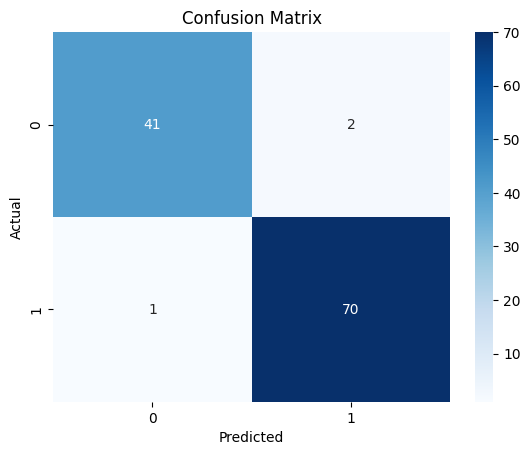

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc:.2f}")

ROC-AUC Score: 1.00


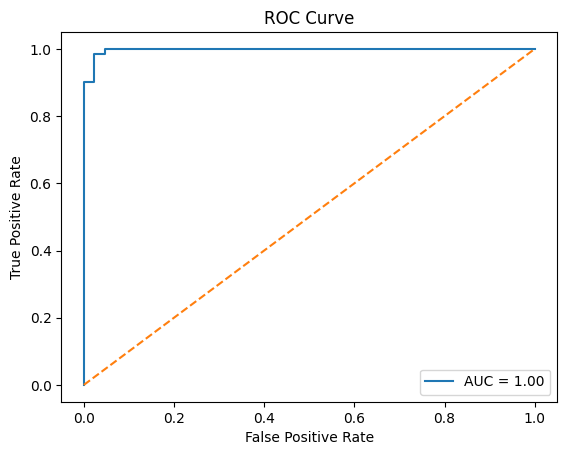

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Tune Threshold and Explain Sigmoid Function

In [16]:
import numpy as np

threshold = 0.4 
y_pred_thresh = (y_prob >= threshold).astype(int)

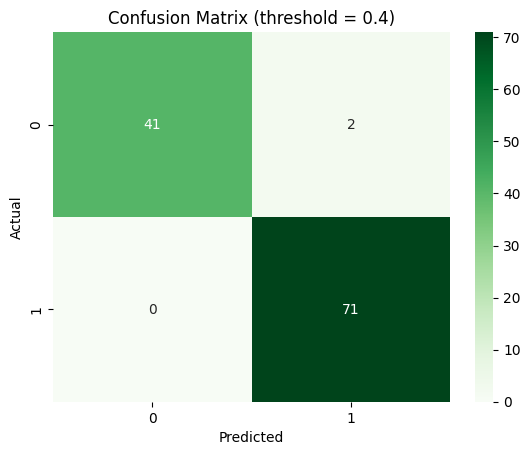

In [17]:
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm_thresh, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Sigmoid Function (Logistic Function):
The logistic regression model uses the sigmoid function to convert raw values into probabilities:

𝜎
(
𝑧
)
=
1/
1
+
𝑒
−
𝑧

​
 
z is the linear combination: 
𝑧
=
𝑤
0
+
𝑤
1
𝑥
1
+
⋯
+
𝑤
𝑛
𝑥
𝑛
z=w 
0
​
 +w 
1
​
 x 
1
​
 +⋯+w 
n
​
 x 
n
​
 

Output is always between 0 and 1 → interpreted as probability

If probability ≥ threshold → predict class 1, else 0

